In [19]:

import numpy
from onnxruntime import InferenceSession
from sklearn.datasets import load_diabetes
from sklearn.ensemble import (
    GradientBoostingRegressor, RandomForestRegressor,
    VotingRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from skl2onnx import to_onnx
from mlprodict.onnxrt import OnnxInference


In [20]:

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=5)
reg2 = RandomForestRegressor(random_state=1, n_estimators=5)
reg3 = LinearRegression()

ereg = Pipeline(steps=[
    ('voting', VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])),
])
ereg.fit(X_train, y_train)


Pipeline(steps=[('voting',
                 VotingRegressor(estimators=[('gb',
                                              GradientBoostingRegressor(n_estimators=5,
                                                                        random_state=1)),
                                             ('rf',
                                              RandomForestRegressor(n_estimators=5,
                                                                    random_state=1)),
                                             ('lr', LinearRegression())]))])

In [61]:
ereg.best_

AttributeError: 'Pipeline' object has no attribute 'best_'

In [81]:
dataset = data

In [82]:
dataset.dtypes

sequence_id             int64
sequence              float64
rev_comp              float64
productive             object
v_call                 object
d_call                float64
j_call                 object
sequence_alignment    float64
germline_alignment    float64
junction              float64
junction_aa           float64
v_cigar               float64
d_cigar               float64
j_cigar               float64
cdr3_aa                object
locus                  object
duplicate_count         int64
vj_in_frame            object
stop_codon             object
my_signal              object
v_genes                object
j_genes                object
v_subgroups            object
j_subgroups            object
region_types           object
frame_types            object
dtype: object

In [83]:
datasetx

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,...,locus,duplicate_count,vj_in_frame,stop_codon,v_genes,j_genes,v_subgroups,j_subgroups,region_types,frame_types
0,0,NaN,NaN,T,TRBV1-1*01,NaN,TRBJ1-1*01,NaN,NaN,NaN,...,TRB,1,T,F,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,IMGT_CDR3,IN
1,1,NaN,NaN,T,TRBV1-1*01,NaN,TRBJ1-1*01,NaN,NaN,NaN,...,TRB,1,T,F,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,IMGT_CDR3,IN
2,2,NaN,NaN,T,TRBV1-1*01,NaN,TRBJ1-1*01,NaN,NaN,NaN,...,TRB,1,T,F,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,IMGT_CDR3,IN
3,3,NaN,NaN,T,TRBV1-1*01,NaN,TRBJ1-1*01,NaN,NaN,NaN,...,TRB,1,T,F,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,IMGT_CDR3,IN
4,4,NaN,NaN,T,TRBV1-1*01,NaN,TRBJ1-1*01,NaN,NaN,NaN,...,TRB,1,T,F,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,IMGT_CDR3,IN
5,5,NaN,NaN,T,TRBV1-1*01,NaN,TRBJ1-1*01,NaN,NaN,NaN,...,TRB,1,T,F,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,IMGT_CDR3,IN
6,6,NaN,NaN,T,TRBV1-1*01,NaN,TRBJ1-1*01,NaN,NaN,NaN,...,TRB,1,T,F,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,IMGT_CDR3,IN
7,7,NaN,NaN,T,TRBV1-1*01,NaN,TRBJ1-1*01,NaN,NaN,NaN,...,TRB,1,T,F,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,IMGT_CDR3,IN
8,8,NaN,NaN,T,TRBV1-1*01,NaN,TRBJ1-1*01,NaN,NaN,NaN,...,TRB,1,T,F,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,IMGT_CDR3,IN
9,9,NaN,NaN,T,TRBV1-1*01,NaN,TRBJ1-1*01,NaN,NaN,NaN,...,TRB,1,T,F,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,IMGT_CDR3,IN


In [84]:
datasetx = dataset.drop(["my_signal"], axis = 1)

In [85]:
datasety = dataset[["my_signal"]]

In [73]:
datasety = datasety.notna()


In [86]:
datasety = datasety.to_numpy()

In [87]:
datasetx = datasetx.to_numpy()

In [74]:
datasety

,my_signal
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,True


In [88]:
X_train, X_test, y_train, y_test = train_test_split(datasetx, datasety)


In [89]:
X_train

array([[5, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'EAKVEVGACL', 'TRB', 1, 'T', 'F', 'TRBV1-1',
        'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [7, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'EPYFANGQGAVD', 'TRB', 1, 'T', 'F',
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [8, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'EEFYTFARRT', 'TRB', 1, 'T', 'F', 'TRBV1-1',
        'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [1, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'CTWLACGQPL', 'TRB', 1, 'T', 'F', 'TRBV1-1',
        'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [0, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'IEAKIYSGQVIG', 'TRB', 1, 'T', 'F',
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ

In [78]:
iris = load_iris()
X, y = iris.data, iris.target


In [79]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
X_train[:1]

array([[-0.04910502, -0.04464164,  0.16085492, -0.04698506, -0.02908802,
        -0.01978964, -0.04708248,  0.03430886,  0.02801651,  0.01134862]])

In [33]:
xtrain1 = Xtrain.to_numpy()

In [43]:
xtest1 = data.to_numpy()


In [44]:
xtest1

array([[0, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'IEAKIYSGQVIG', 'TRB', 1, 'T', 'F', nan,
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [1, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'CTWLACGQPL', 'TRB', 1, 'T', 'F', nan,
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [2, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'GTINQHAPFP', 'TRB', 1, 'T', 'F', nan,
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [3, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'KCGDYFIRVSME', 'TRB', 1, 'T', 'F', nan,
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [4, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'QICWHEDAPH', 'TRB', 1, 'T', 'F', nan,
        'TRBV1-1', 

In [39]:
xtrain1[:1]

array([[0, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'IEAKIYSGQVIG', 'TRB', 1, 'T', 'F', nan,
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN']],
      dtype=object)

In [92]:
X_train

array([[5, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'EAKVEVGACL', 'TRB', 1, 'T', 'F', 'TRBV1-1',
        'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [7, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'EPYFANGQGAVD', 'TRB', 1, 'T', 'F',
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [8, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'EEFYTFARRT', 'TRB', 1, 'T', 'F', 'TRBV1-1',
        'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [1, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'CTWLACGQPL', 'TRB', 1, 'T', 'F', 'TRBV1-1',
        'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [0, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'IEAKIYSGQVIG', 'TRB', 1, 'T', 'F',
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ

In [91]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
clr.fit(X_train, y_train)


ValueError: could not convert string to float: 'T'

In [95]:
onx = to_onnx(ereg, X_train[:3])


In [94]:
sess = InferenceSession(onx.SerializeToString(),
                        providers=['CPUExecutionProvider'])
pred_ort = sess.run(None, {'X': xtest1})[0]

pred_skl = ereg.predict(xtest1[:10])

print("Onnx Runtime prediction:\n", pred_ort[:5])
print("Sklearn rediction:\n", pred_skl[:5])


InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Got invalid dimensions for input: X for the following indices
 index: 1 Got: 26 Expected: 25
 Please fix either the inputs or the model.

In [13]:
type(onx)


onnx.onnx_ml_pb2.ModelProto

In [15]:
onx.__dir__

<function ModelProto.__dir__()>

In [ ]:
with open("logreg_iris.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [ ]:
InferenceSession(onx.SerializeToString)

In [6]:
sess = InferenceSession(onx.SerializeToString(),
                        providers=['CPUExecutionProvider'])
pred_ort = sess.run(None, {'X': X_test.astype(numpy.float32)})[0]

pred_skl = ereg.predict(X_test.astype(numpy.float32))

print("Onnx Runtime prediction:\n", pred_ort[:5])
print("Sklearn rediction:\n", pred_skl[:5])


Onnx Runtime prediction:
 [[101.45924 ]
 [120.61491 ]
 [110.804276]
 [135.3427  ]
 [118.72113 ]]
Sklearn rediction:
 [101.45924054 120.61489674 110.80427325 135.34268593 118.72112888]


In [7]:
def diff(p1, p2):
    p1 = p1.ravel()
    p2 = p2.ravel()
    d = numpy.abs(p2 - p1)
    return d.max(), (d / numpy.abs(p1)).max()


print(diff(pred_skl, pred_ort))


(2.7230415383883155e-05, 1.5714640605370315e-07)


##### A python runtime can be used as well to compute the prediction. It is not meant to be used into production (it still relies on python), but it is useful to investigate why the conversion went wrong. It uses module mlprodict.



In [17]:
oinf = OnnxInference(onx, runtime="python_compiled")
print(oinf)


OnnxInference(...)
    def compiled_run(dict_inputs, yield_ops=None):
        if yield_ops is not None:
            raise NotImplementedError('yields_ops should be None.')
        # init: w0 (w0)
        # inputs
        X = dict_inputs['X']
        (var_0, ) = n0_treeensembleregressor(X)
        (var_2, ) = n1_linearregressor(X)
        (var_1, ) = n2_treeensembleregressor(X)
        (wvar_1, ) = n3_mul(var_1, w0)
        (wvar_0, ) = n4_mul(var_0, w0)
        (wvar_2, ) = n5_mul(var_2, w0)
        (fvar_0, ) = n6_flatten(wvar_0)
        (fvar_1, ) = n7_flatten(wvar_1)
        (fvar_2, ) = n8_flatten(wvar_2)
        (variable, ) = n9_sum(fvar_0, fvar_1, fvar_2)
        return {
            'variable': variable,
        }


In [18]:
pred_pyrt = oinf.run({'X': X_test.astype(numpy.float32)})['variable']
print(diff(pred_skl, pred_pyrt))


(2.7230415383883155e-05, 1.5714640605370315e-07)


In [30]:
import graphviz
from IPython.display import display
gvz=graphviz.Source(oinf.to_dot())

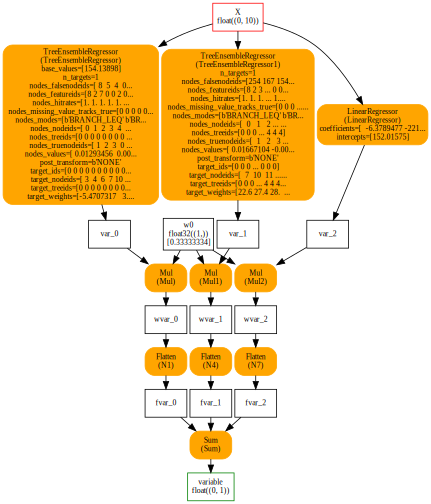

In [31]:
display(gvz)


In [5]:
import hashlib, hmac, binascii

mac = hmac.new(b'061ba89f50bd126735ae721efdf4754fc28bbabd426337377d0f7cd0bdb39cb5', b'some msg', hashlib.sha256).digest()
print(binascii.hexlify(mac))

b'fe04b709899554a3764d22516a8b55e2c1296f0ad24c891ff171330253d6a43d'


In [6]:
ereg._final_estimator

NameError: name 'ereg' is not defined

In [2]:
import secrets

In [3]:
secrets.token_hex(32)

'061ba89f50bd126735ae721efdf4754fc28bbabd426337377d0f7cd0bdb39cb5'

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_


{'C': 2.195254015709299, 'penalty': 'l1'}

In [23]:
search.best_estimator_.__class__.__name__

'LogisticRegression'

In [15]:
search.best_estimator_

LogisticRegression(C=2.195254015709299, max_iter=200, penalty='l1',
                   random_state=0, solver='saga', tol=0.01)

In [26]:
import dill

In [27]:
secrets.token_hex(32)


'7adf9e73165b41260977c4f16a22d3f587445df9d0495ee0417bf01b33307f50'

In [24]:
file_path = f"{search.best_estimator_.__class__.__name__}.pickle"
with file_path.open("wb") as file:
    dill.dump(search, file)


AttributeError: 'str' object has no attribute 'open'

In [11]:
from immuneML.util.PathBuilder import PathBuilder


In [36]:
path = PathBuilder.build("../ml_methods")
path


WindowsPath('../ml_methods')

In [38]:
import hashlib
import hmac
import dill

data = dill.dumps(search)
digest = hmac.new(b'7adf9e73165b41260977c4f16a22d3f587445df9d0495ee0417bf01b33307f50',
                  data, hashlib.blake2b).hexdigest()

path = PathBuilder.build("../ml_methods")

file_path = path / \
    f"{str(digest)}-{search.best_estimator_.__class__.__name__}.pickle"

with file_path.open("wb") as file:
    dill.dump(search, file)
                 



In [51]:
type(data)

bytes

In [ ]:
file.read()

In [55]:
pickle_in = open(filename,"rb")

In [56]:
pickle_in

<_io.BufferedReader name='9ae070f604aa6c54817db3d0719276d7c1f02682e3a18966b1f92d2c04fd678371386d7587ea0521b12acf36aa22dd573e9be111263d57098fee3699211fe3e3-LogisticRegression.pickle'>

In [10]:
dat

NameError: name 'dat' is not defined

In [58]:
with open(filename, "rb") as f:
    read_data = f.read()


In [9]:
read_dat

NameError: name 'read_dat' is not defined

In [60]:
type(read_data)

bytes

In [57]:
bytes_data = file.read(pickle_in)

UnsupportedOperation: read

In [39]:
file_path

WindowsPath('../ml_methods/9ae070f604aa6c54817db3d0719276d7c1f02682e3a18966b1f92d2c04fd678371386d7587ea0521b12acf36aa22dd573e9be111263d57098fee3699211fe3e3-LogisticRegression.pickle')

In [42]:
file_path.name

'9ae070f604aa6c54817db3d0719276d7c1f02682e3a18966b1f92d2c04fd678371386d7587ea0521b12acf36aa22dd573e9be111263d57098fee3699211fe3e3-LogisticRegression.pickle'

In [43]:
filename = file_path.name
digest, pickle_data = filename.split('-')


In [44]:
digest

'9ae070f604aa6c54817db3d0719276d7c1f02682e3a18966b1f92d2c04fd678371386d7587ea0521b12acf36aa22dd573e9be111263d57098fee3699211fe3e3'

In [45]:
pickle_data

'LogisticRegression.pickle'

In [63]:
import hashlib
import hmac
import pickle
import secrets

filename = file_path.name
digest, pickle_data = filename.split('-')

expected_digest = hmac.new(
    b'7adf9e73165b41260977c4f16a22d3f587445df9d0495ee0417bf01b33307f50', read_data, hashlib.blake2b).hexdigest()
print(expected_digest)
if not secrets.compare_digest(digest, expected_digest):
    print('Invalid signature')
    exit(1)

obj = pickle.loads(data)


9ae070f604aa6c54817db3d0719276d7c1f02682e3a18966b1f92d2c04fd678371386d7587ea0521b12acf36aa22dd573e9be111263d57098fee3699211fe3e3


In [52]:
type(obj)

sklearn.model_selection._search.RandomizedSearchCV

In [7]:
from dotenv import load_dotenv
import os

load_dotenv()
print(os.environ.get('secret'))


7adf9e73165b41260977c4f16a22d3f587445df9d0495ee0417bf01b33307f50


In [12]:
import hashlib
import hmac
import dill

data = dill.dumps(search)
digest = hmac.new(str.encode(os.environ.get('secret')),
                  data, hashlib.blake2b).hexdigest()
print(digest)
print(type(digest))

path = PathBuilder.build("../ml_methods")

file_path = path / \
    f"{str(digest)}-{search.best_estimator_.__class__.__name__}.pickle"

with file_path.open("wb") as file:
    dill.dump(search, file)


984b044f04feda9e270e9080f16c2bc9c4341fa3e88ff508f3572e847ad22a4faeff52bbd90718bcf1314585782a5c193203623fec20959fe19fab37508d141f
<class 'str'>


In [14]:
filename = file_path.name

In [15]:
with open(filename, "rb") as f:
    read_data = f.read()


In [17]:
filename.split('-')[0]

'984b044f04feda9e270e9080f16c2bc9c4341fa3e88ff508f3572e847ad22a4faeff52bbd90718bcf1314585782a5c193203623fec20959fe19fab37508d141f'

In [18]:
import hashlib
import hmac
import pickle
import secrets

filename = file_path.name
digest, pickle_data = filename.split('-')

expected_digest = hmac.new(
    b'secret', read_data, hashlib.blake2b).hexdigest()
print(expected_digest)
if not secrets.compare_digest(digest, expected_digest):
    raise SystemExit("Invalid Signature")
    exit(1)

obj = dill.loads(data)


30535785f03a5c28ab9157726c6273964d0a55c97a6f15e30e17314b2049a731416e98f8a85a37aa051a5218d79ae206325f09766b71b04af3850a34a5241003


SystemExit: Invalid Signature

In [89]:
obj

RandomizedSearchCV(estimator=LogisticRegression(max_iter=200, random_state=0,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000285B5619C40>,
                                        'penalty': ['l2', 'l1']},
                   random_state=0)

In [80]:
model = search.best_estimator_

In [108]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_type = [('float_input', FloatTensorType([None, 10]))]
onx = convert_sklearn(model, initial_types=initial_type)
with open("logreg_iris.onnx", "wb") as f:
    f.write(onx.SerializeToString())


ValueError: Initial types are required. See usage of convert(...) in skl2onnx.convert for details

In [99]:
X_test.astype(numpy.float32)[0]


array([-0.00551456, -0.04464164,  0.04229559,  0.04941532,  0.02457414,
       -0.02386057,  0.07441156, -0.03949338,  0.05228   ,  0.02791705],
      dtype=float32)

In [ ]:
sess.run()

In [100]:
import numpy
import onnxruntime as rt

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [102]:
sess = rt.InferenceSession("logreg_iris.onnx" , providers=[ 'CUDAExecutionProvider', 'CPUExecutionProvider'])
input_name = sess.get_inputs()[0].name
print(input_name)
pred_onx = sess.run(None, {input_name: X_test.astype(numpy.float32)})[0]
print(pred_onx)


float_input
[0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0
 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0]


In [104]:
import numpy
import onnxruntime as rt

sess = rt.InferenceSession("logreg_iris.onnx", providers=[ 'CUDAExecutionProvider', 'CPUExecutionProvider'])
input_name = sess.get_inputs()[0].name
print(sess.get_inputs()[0])
label_name = sess.get_outputs()[0].name
print(sess.get_outputs()[0])
pred_onx = sess.run(
    [label_name], {input_name: X_test.astype(numpy.float32)})[0]
print(pred_onx)


NodeArg(name='float_input', type='tensor(float)', shape=[None, 10])
NodeArg(name='output_label', type='tensor(int64)', shape=[None])
[0 0 1 2 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 2 1 0 1 2 1 1 0 0
 1 1 2 1 2 1 2 1 2 1 2 1 1 1 0 0 2 1 1 2 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1
 2 1 2 0 0 1 1 0 1 1 1 2 0 1 1 0 0 2 1 1 0 0 0 1 1 1 2 1 0 2 1 1 0 1 2 1 1]


In [109]:
import os
import pickle
import shutil
from unittest import TestCase

import numpy as np
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from immuneML.IO.ml_method.MLMethodConfiguration import MLMethodConfiguration
from immuneML.data_model.encoded_data.EncodedData import EncodedData
from immuneML.environment.EnvironmentSettings import EnvironmentSettings
from immuneML.environment.Label import Label
from immuneML.ml_methods.KNN import KNN
from immuneML.ml_methods.SVM import SVM
from immuneML.util.PathBuilder import PathBuilder


C:\Users\karth\anaconda3\envs\test\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def test_load():
    x = np.array([[1, 0, 0], [0, 1, 1], [1, 1, 1], [0, 1, 1]])
    y = {"default": np.array([1, 0, 2, 0])}
    x = np.array([[1, 0, 0], [0, 1, 1], [1, 1, 1], [0, 1, 1]])


    knn = KNN()
    knn.fit(EncodedData(examples=sparse.csr_matrix(
         x), labels=y), Label("default"))

     path = EnvironmentSettings.root_path / "test/tmp/loadtestsklearn/"
        PathBuilder.build(path)

       with open(path / "knn.pickle", "wb") as file:
            pickle.dump(knn.model, file)
        

        config = MLMethodConfiguration()
        config.labels_with_values = {"default": [0, 1, 2]}
        config.store(path / "config.json")

        knn2 = KNN()
        knn2.load(path)

        self.assertTrue(isinstance(knn2.model, KNeighborsClassifier))

        shutil.rmtree(path)


In [113]:
data = np.load(r"C:\Users\karth\Desktop\PhD projects\immuneML\dev_immuneML\immuneML\output_dir1\synthetic_dataset\result\datasets\my_synthetic_dataset\repertoires\rep_0.npy")


In [22]:
import pandas as pd

In [23]:
meta_data = pd.read_csv(r"C:\Users\karth\Desktop\PhD projects\immuneML\dev_immuneML\immuneML\output_dir1\synthetic_dataset\result\simulation_instruction\exported_dataset\airr\metadata.csv")


In [24]:
meta_data

,my_signal,subject_id,identifier,filename
0,True,rep_0,db5692335878412aaf4101f032ab5ad2,repertoires\db5692335878412aaf4101f032ab5ad2.tsv
1,True,rep_1,5e99bfa08fa8420f8e74799411db0412,repertoires\5e99bfa08fa8420f8e74799411db0412.tsv
2,True,rep_2,5cc98ccfdb534c4a87b6bf7a8e0c6b91,repertoires\5cc98ccfdb534c4a87b6bf7a8e0c6b91.tsv
3,True,rep_3,d500763518ee441cacfedc45a3c50078,repertoires\d500763518ee441cacfedc45a3c50078.tsv
4,True,rep_4,37c963b40e2349bbaed9371021319042,repertoires\37c963b40e2349bbaed9371021319042.tsv
...,...,...,...,...
95,False,rep_95,ae68359707ba44ada1628f6546f461ba,repertoires\ae68359707ba44ada1628f6546f461ba.tsv
96,False,rep_96,e533cd6da607438f88b846535b6c0c08,repertoires\e533cd6da607438f88b846535b6c0c08.tsv
97,False,rep_97,5d28b0c662cf4a8fbb830ba032631652,repertoires\5d28b0c662cf4a8fbb830ba032631652.tsv
98,False,rep_98,93063c96c8bf4adfbc74cd2d25fdf2df,repertoires\93063c96c8bf4adfbc74cd2d25fdf2df.tsv


In [65]:
data = pd.read_csv(r"C:\Users\karth\Desktop\PhD projects\immuneML\dev_immuneML\immuneML\output_dir1\synthetic_dataset\result\simulation_instruction\exported_dataset\airr\repertoires\741c9519c70d4b2c8f29bc15c5e63fb2.tsv", sep="\t")


In [66]:
data.dtypes

sequence_id             int64
sequence              float64
rev_comp              float64
productive             object
v_call                 object
d_call                float64
j_call                 object
sequence_alignment    float64
germline_alignment    float64
junction              float64
junction_aa           float64
v_cigar               float64
d_cigar               float64
j_cigar               float64
cdr3_aa                object
locus                  object
duplicate_count         int64
vj_in_frame            object
stop_codon             object
my_signal              object
v_genes                object
j_genes                object
v_subgroups            object
j_subgroups            object
region_types           object
frame_types            object
dtype: object

In [29]:
data.to_numpy()


array([[0, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'IEAKIYSGQVIG', 'TRB', 1, 'T', 'F', nan,
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [1, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'CTWLACGQPL', 'TRB', 1, 'T', 'F', nan,
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [2, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'GTINQHAPFP', 'TRB', 1, 'T', 'F', nan,
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [3, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'KCGDYFIRVSME', 'TRB', 1, 'T', 'F', nan,
        'TRBV1-1', 'TRBJ1-1', 'TRBV1', 'TRBJ1', 'IMGT_CDR3', 'IN'],
       [4, nan, nan, 'T', 'TRBV1-1*01', nan, 'TRBJ1-1*01', nan, nan, nan,
        nan, nan, nan, nan, 'QICWHEDAPH', 'TRB', 1, 'T', 'F', nan,
        'TRBV1-1', 

In [117]:
pd.DataFrame(data)

,sequence_aas,v_genes,j_genes,v_subgroups,j_subgroups,v_alleles,j_alleles,chains,counts,region_types,frame_types,sequence_identifiers
0,QKTRKGSIYR,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,TRBV1-1*01,TRBJ1-1*01,BETA,1,IMGT_CDR3,IN,0
1,KIMYAAPYTL,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,TRBV1-1*01,TRBJ1-1*01,BETA,1,IMGT_CDR3,IN,1
2,LHSHPYTYCC,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,TRBV1-1*01,TRBJ1-1*01,BETA,1,IMGT_CDR3,IN,2
3,HCMTHLTTYD,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,TRBV1-1*01,TRBJ1-1*01,BETA,1,IMGT_CDR3,IN,3
4,HYSPCHGDVFVN,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,TRBV1-1*01,TRBJ1-1*01,BETA,1,IMGT_CDR3,IN,4
5,GIVALACFKR,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,TRBV1-1*01,TRBJ1-1*01,BETA,1,IMGT_CDR3,IN,5
6,QMNLKPQDVSEY,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,TRBV1-1*01,TRBJ1-1*01,BETA,1,IMGT_CDR3,IN,6
7,VYLRNLVHIVPY,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,TRBV1-1*01,TRBJ1-1*01,BETA,1,IMGT_CDR3,IN,7
8,VPVTCDNMMDWP,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,TRBV1-1*01,TRBJ1-1*01,BETA,1,IMGT_CDR3,IN,8
9,WRFTMFIHTDMH,TRBV1-1,TRBJ1-1,TRBV1,TRBJ1,TRBV1-1*01,TRBJ1-1*01,BETA,1,IMGT_CDR3,IN,9


In [7]:
import os
import shutil
from unittest import TestCase

import pandas as pd

from immuneML.analysis.data_manipulation.NormalizationType import NormalizationType
from immuneML.caching.CacheType import CacheType
from immuneML.encodings.EncoderParams import EncoderParams
from immuneML.encodings.kmer_frequency.KmerFreqRepertoireEncoder import KmerFreqRepertoireEncoder
from immuneML.util.ReadsType import ReadsType
from immuneML.encodings.kmer_frequency.sequence_encoding.SequenceEncodingType import SequenceEncodingType
from immuneML.environment.Constants import Constants
from immuneML.environment.EnvironmentSettings import EnvironmentSettings
from immuneML.environment.Label import Label
from immuneML.environment.LabelConfiguration import LabelConfiguration
from immuneML.hyperparameter_optimization.HPSetting import HPSetting
from immuneML.simulation.dataset_generation.RandomDatasetGenerator import RandomDatasetGenerator
from immuneML.util.PathBuilder import PathBuilder
from immuneML.workflows.instructions.ml_model_application.MLApplicationInstruction import MLApplicationInstruction

In [5]:
import os
import pickle
import shutil
from unittest import TestCase

import numpy as np
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

from immuneML.caching.CacheType import CacheType
from immuneML.data_model.encoded_data.EncodedData import EncodedData
from immuneML.environment.Constants import Constants
from immuneML.environment.EnvironmentSettings import EnvironmentSettings
from immuneML.environment.Label import Label
from DaskLogisticRegression import DaskLogisticRegression
from immuneML.util.PathBuilder import PathBuilder
from immuneML.simulation.dataset_generation.RandomDatasetGenerator import RandomDatasetGenerator


In [9]:
path = EnvironmentSettings.tmp_test_path / "mlapplicationtest/"
PathBuilder.build(path)

dataset = RandomDatasetGenerator.generate_repertoire_dataset(
    50, {5: 1}, {5: 1}, {"l1": {1: 0.5, 2: 0.5}}, path / 'dataset/')
ml_method = DaskLogisticRegression()
encoder = KmerFreqRepertoireEncoder(NormalizationType.RELATIVE_FREQUENCY, ReadsType.UNIQUE, SequenceEncodingType.CONTINUOUS_KMER, 3,
                                    scale_to_zero_mean=True, scale_to_unit_variance=True)
label = Label("l1", [1, 2])
label_config = LabelConfiguration([label])

enc_dataset = encoder.encode(dataset, EncoderParams(
    result_path=path, label_config=label_config, filename="tmp_enc_dataset.pickle", pool_size=4))


c:\Users\karth\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\karth\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [10]:
ml_method.fit(enc_dataset.encoded_data, label)

hp_setting = HPSetting(encoder, {"normalization_type": "relative_frequency", "reads": "unique", "sequence_encoding": "continuous_kmer",
                                 "k": 3, "scale_to_zero_mean": True, "scale_to_unit_variance": True}, ml_method, {}, [], 'enc1', 'ml1')

PathBuilder.build(path / 'result/instr1/')


{'max_iter': 1000, 'solver': 'saga'}
<bound method DaskSklearnMethod._get_model_filename of <DaskLogisticRegression.DaskLogisticRegression object at 0x0000020F7437ADC0>>
{'penalty': 'l2', 'dual': False, 'tol': 0.0001, 'C': 1.0, 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'random_state': None, 'solver': 'saga', 'max_iter': 1000, 'multi_class': 'auto', 'verbose': 0, 'warm_start': False, 'n_jobs': None, 'l1_ratio': None}
DASK workflow


WindowsPath('C:/Users/karth/Desktop/PhD projects/immuneML/immuneML/test/tmp/mlapplicationtest/result/instr1')

In [11]:
path

WindowsPath('C:/Users/karth/Desktop/PhD projects/immuneML/immuneML/test/tmp/mlapplicationtest')

In [12]:
ml_app = MLApplicationInstruction(dataset, label_config, hp_setting, 4, "instr1")
ml_app.run(path / 'result/')

predictions_path = path / "result/instr1/predictions.csv"

2022-05-27 10:12:43.490637: Encoding started...
2022-05-27 10:12:47.759962: Encoding finished.


c:\Users\karth\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [13]:
        df = pd.read_csv(predictions_path)


In [14]:
df

,repertoire_file,example_id,l1,l1_1_proba,l1_2_proba
0,rep_0.npy,7399cfb9af2d43f49824b587a1ddc1da,1,0.993781,0.006219
1,rep_1.npy,9cca28e623e04026ba02717b54a544ea,1,0.993763,0.006237
2,rep_2.npy,6d931c46b3c74594aef188a40aef72c7,1,0.993769,0.006231
3,rep_3.npy,5ed944d5187648129975ef6dde781fc4,1,0.993785,0.006215
4,rep_4.npy,d2aad70624ff44a488797064da2c19a6,1,0.993627,0.006373
5,rep_5.npy,3c4cb4c887014d3ab3d290a2d12fa264,2,0.008095,0.991905
6,rep_6.npy,f7c45c140edf4cb28a1424a00037218d,1,0.994182,0.005818
7,rep_7.npy,0ac77582848b4d2d99d64138ebfa3814,1,0.993790,0.006210
8,rep_8.npy,1b327897f8424f2ebfb29e1a48efeb7a,2,0.007937,0.992063
9,rep_9.npy,daa63945e8674191bd0470bbdf3a95f8,2,0.008530,0.991470


In [18]:
import os 

os.environ['PYTHONPATH']


'C:\\Users\\karth\\Desktop\\PhD projects\\immuneML\\immuneML'

In [19]:
import sys
sys.path.append('../')


In [15]:
lr

In [5]:
import dask
import dask.array as da

In [6]:
from dask_ml.datasets import make_classification


In [2]:
from dask.distributed import Client, progress

client = Client()

In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:62226,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.86 GiB
Comm: tcp://127.0.0.1:62257,Total threads: 2
Dashboard: http://127.0.0.1:62260/status,Memory: 3.96 GiB
Nanny: tcp://127.0.0.1:62232,


In [8]:
n, d = 5000000, 100

X, y = make_classification(n_samples=n, n_features=d,
                           chunks=n // 10, flip_y=0.2)
X

dask.array<normal, shape=(5000000, 100), dtype=float64, chunksize=(500000, 100), chunktype=numpy.ndarray>

In [40]:
lr = DaskLogisticRegression()


In [9]:
from dask_ml.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train


dask.array<concatenate, shape=(4500000, 100), dtype=float64, chunksize=(450000, 100), chunktype=numpy.ndarray>

In [10]:
X_train, X_test, y_train, y_test = dask.persist(
    X_train, X_test, y_train, y_test)


In [11]:
classes = da.unique(y_train).compute()
classes

array([0, 1])

In [13]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:62226,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: 1 minute ago,Total memory: 15.86 GiB
Comm: tcp://127.0.0.1:62257,Total threads: 2
Dashboard: http://127.0.0.1:62260/status,Memory: 3.96 GiB
Nanny: tcp://127.0.0.1:62232,


In [12]:
label

NameError: name 'label' is not defined

In [14]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()


In [15]:
import joblib

In [1]:
clr

NameError: name 'clr' is not defined

In [26]:
import dask_ml.linear_model as dasklm


In [27]:
lr = dasklm.LogisticRegression()

In [2]:
client

NameError: name 'client' is not defined

In [1]:
lr.fit(X_train, y_train)

NameError: name 'lr' is not defined

In [16]:
with joblib.parallel_backend("dask"):
    

    clr.fit(X_train, y_train)



distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting


TypeError: 'CancelledError' object is not iterable

distributed.nanny - WARNING - Restarting worker


In [2]:
x = np.array([[1, 0, 0], [0, 1, 1], [1, 1, 1], [0, 1, 1]])
y = {"test": np.array([1, 0, 2, 0])}

lr = DaskLogisticRegression()
lr.fit(EncodedData(x, y), Label("test"))


{'max_iter': 1000, 'solver': 'saga'}
<bound method DaskSklearnMethod._get_model_filename of <DaskLogisticRegression.DaskLogisticRegression object at 0x000001CDD08021F0>>
{'penalty': 'l2', 'dual': False, 'tol': 0.0001, 'C': 1.0, 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'random_state': None, 'solver': 'saga', 'max_iter': 1000, 'multi_class': 'auto', 'verbose': 0, 'warm_start': False, 'n_jobs': None, 'l1_ratio': None}
DASK workflow


In [4]:
x = np.array([[1, 0, 0], [0, 1, 1], [1, 1, 1], [0, 1, 1]])
y = {"test1": [1, 0, 2, 0], "test2": [1, 0, 2, 0]}

lr = DaskLogisticRegression()
lr.fit(EncodedData(x, y), Label("test2"))

test_x = np.array([[0, 1, 0], [1, 0, 0]])
y = lr.predict(EncodedData(test_x), Label("test2"))


{'max_iter': 1000, 'solver': 'saga'}
<bound method DaskSklearnMethod._get_model_filename of <DaskLogisticRegression.DaskLogisticRegression object at 0x000001CDD0A0B040>>
{'penalty': 'l2', 'dual': False, 'tol': 0.0001, 'C': 1.0, 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'random_state': None, 'solver': 'saga', 'max_iter': 1000, 'multi_class': 'auto', 'verbose': 0, 'warm_start': False, 'n_jobs': None, 'l1_ratio': None}
DASK workflow


AttributeError: 'dict' object has no attribute '__dict__'

In [3]:
x = EncodedData(
    np.array([[1, 0, 0], [0, 1, 1], [1, 1, 1], [0, 1, 1],
             [1, 0, 0], [0, 1, 1], [1, 1, 1], [0, 1, 1]]),
    {"test1": [1, 0, 2, 0, 1, 0, 2, 0], "test2": [1, 0, 2, 0, 1, 0, 2, 0]})

lr = DaskLogisticRegression()
lr.fit_by_cross_validation(x, number_of_splits=2, label=Label("test2"))


{'max_iter': 1000, 'solver': 'saga'}
<bound method DaskSklearnMethod._get_model_filename of <DaskLogisticRegression.DaskLogisticRegression object at 0x000002643700FFA0>>
{'param_distributions': {'max_iter': [1000]}, 'n_iter': 10, 'random_state': None, 'scoring': 'balanced_accuracy', 'estimator': LogisticRegression(max_iter=1000, solver='saga'), 'n_jobs': -1, 'refit': True, 'cv': 2, 'verbose': 0, 'pre_dispatch': '2*n_jobs', 'error_score': nan, 'return_train_score': False}
DASK workflow


c:\Users\karth\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')


In [1]:
client

NameError: name 'client' is not defined

In [2]:
x = np.array([[1, 0, 0], [0, 1, 1], [1, 1, 1], [0, 1, 1]])
y = {"default": np.array([1, 0, 2, 0])}
lr = DaskLogisticRegression()
lr.fit(EncodedData(x, y), Label("default"))

path = EnvironmentSettings.root_path / "test/tmp/lr/"

lr.store(path, ["f1", "f2", "f3"])


{'max_iter': 1000, 'solver': 'saga'}
<bound method DaskSklearnMethod._get_model_filename of <DaskLogisticRegression.DaskLogisticRegression object at 0x0000020F73D03F70>>
{'penalty': 'l2', 'dual': False, 'tol': 0.0001, 'C': 1.0, 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'random_state': None, 'solver': 'saga', 'max_iter': 1000, 'multi_class': 'auto', 'verbose': 0, 'warm_start': False, 'n_jobs': None, 'l1_ratio': None}
DASK workflow


In [12]:
path = path / "6630e1ea3b9af75f894cd08ab4368127baac472767d446ec68b60ff06ee261bcd5c9ab0bcddd087ef035a1d0730725a49a02c94d7e5040a674b443b71b84dc56-dask_logistic_regression.pickle"


In [3]:
path

WindowsPath('C:/Users/karth/Desktop/PhD projects/immuneML/immuneML/test/tmp/lr')

In [19]:
import DaskLogisticRegression

In [4]:
  

        

        print(path)

        # path = EnvironmentSettings.root_path / "test/tmp/lr/"
        # PathBuilder.build(path)

       

        
        lr.load(path)

C:\Users\karth\Desktop\PhD projects\immuneML\immuneML\test\tmp\lr


ConstructorError: could not determine a constructor for the tag 'tag:yaml.org,2002:python/object/apply:numpy.core.multiarray.scalar'
  in "C:\Users\karth\Desktop\PhD projects\immuneML\immuneML\test\tmp\lr\dask_logistic_regression.yaml", line 3, column 5

In [6]:
path

WindowsPath('C:/Users/karth/Desktop/PhD projects/immuneML/immuneML/test/tmp/lr')

In [5]:
len(y["test2"]) 

2